In [1]:
import keras
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from train_net import test_augmentation
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/maciej/.virtualenvs/base/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Download model using link: https://drive.google.com/open?id=0B3CnabXPXFVNQS1xcFgtd0VyUTA
model = keras.models.load_model('best_model.hdf5')

/home/maciej/.virtualenvs/base/local/lib/python2.7/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [3]:
DATA_PATH = '/home/maciej/intel/data/wyciete_z_wiekszych_ostateczne/'
X_train_cut = pd.read_pickle(DATA_PATH + 'X_train_cut')
y_train_cut = pd.read_pickle(DATA_PATH + 'y_train_cut')

In [4]:
X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(
    X_train_cut, y_train_cut, test_size=0.25, random_state=123)

In [5]:
def test_augmentation(model, datagen, X, n_iter=50):
    pred = []
    print('Predictions are being computed...')
    for _ in range(n_iter):
        pred.append(model.predict_generator(datagen.flow(X, shuffle=False, batch_size=1),
                                            X.shape[0], pickle_safe=True))
    return np.array(pred).mean(axis=0)

In [6]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2, )
preds = test_augmentation(model, datagen, X_test_train, n_iter=3)

Predictions are being computed...


/home/maciej/.virtualenvs/base/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<keras.pre..., 371, use_multiprocessing=True)`
  


In [7]:
print "Accuracy: {}".format(accuracy_score(y_test_train, np.argmax(preds, axis=1)))
print "Percentage of labels: ", np.unique(y_test_train, return_counts=True)[1]/512.
print "Percentage of preds: ", np.unique(np.argmax(preds, axis=1), return_counts=True)[1]/512.
print "Log loss: {}".format(log_loss(y_test_train, preds))
print "Confusion matrix: "
pd.DataFrame(confusion_matrix(y_test_train, np.argmax(preds, axis=1)), columns=['0', '1', '2'], index=[0, 1, 2])

Accuracy: 0.630727762803
Percentage of labels:  [ 0.125       0.40429688  0.1953125 ]
Percentage of preds:  [ 0.10351562  0.4140625   0.20703125]
Log loss: 0.775055989937
Confusion matrix: 


,0,1,2
0,22,38,4
1,29,144,34
2,2,30,68


[[ 0.09622877  0.31203559  0.59173566]] True label:  2


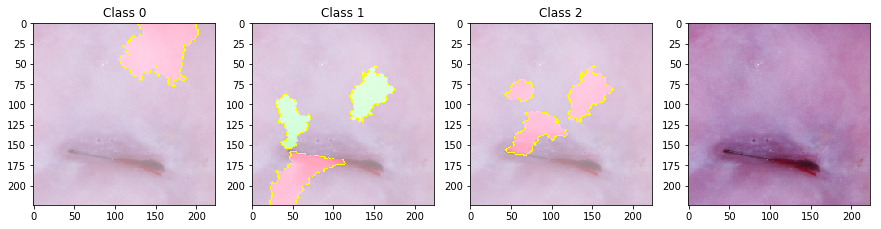

In [12]:
# index of image to display
ex = 15

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(X_test_train[ex]/255., classifier_fn=model.predict,
                                        top_labels=3, hide_color=0)

plt.figure(figsize=(15,12))
plt.subplot(141)
plt.title('Class 0')
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(142)
plt.title('Class 1')
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.00000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(143)
plt.title('Class 2')
temp, mask = explanation.get_image_and_mask(2, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.0000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

plt.subplot(144)
plt.imshow(X_test_train[ex]/255.)

print model.predict(X_test_train[ex:ex+1]/255.), "True label: ", y_test_train[ex]
# green parts tells model that image belongs to specific class(left image class 0), red parts tells model that
# it is not that class

[[ 0.09583407  0.31246951  0.59169644]] True label:  1


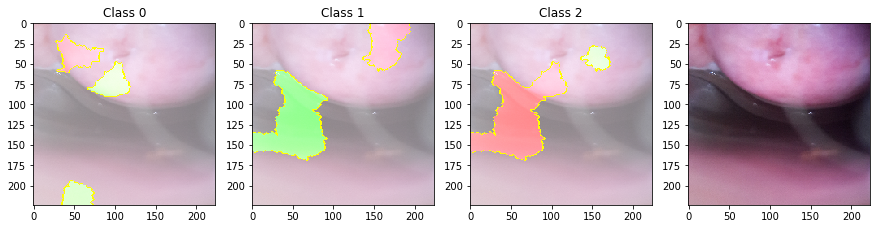

In [13]:
# index of image to display
ex = 2

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(X_test_train[ex]/255., classifier_fn=model.predict,
                                        top_labels=3, hide_color=0)

plt.figure(figsize=(15,12))
plt.subplot(141)
plt.title('Class 0')
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(142)
plt.title('Class 1')
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.00000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(143)
plt.title('Class 2')
temp, mask = explanation.get_image_and_mask(2, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.0000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

plt.subplot(144)
plt.imshow(X_test_train[ex]/255.)

print model.predict(X_test_train[ex:ex+1]/255.), "True label: ", y_test_train[ex]
# green parts tells model that image belongs to specific class(left image class 0), red parts tells model that
# it is not that class

[[ 0.09667546  0.31386647  0.58945805]] True label:  1


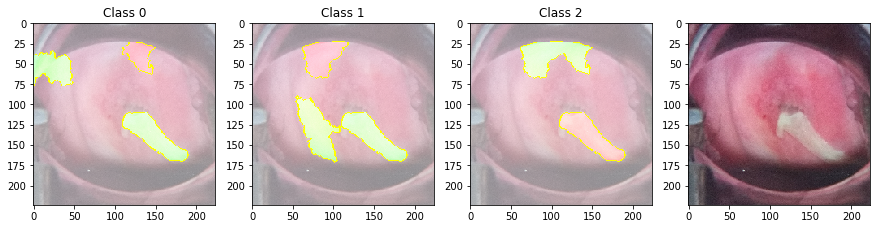

In [14]:
# index of image to display
ex = 32

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(X_test_train[ex]/255., classifier_fn=model.predict,
                                        top_labels=3, hide_color=0)

plt.figure(figsize=(15,12))
plt.subplot(141)
plt.title('Class 0')
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(142)
plt.title('Class 1')
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.00000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(143)
plt.title('Class 2')
temp, mask = explanation.get_image_and_mask(2, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.0000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

plt.subplot(144)
plt.imshow(X_test_train[ex]/255.)

print model.predict(X_test_train[ex:ex+1]/255.), "True label: ", y_test_train[ex]
# green parts tells model that image belongs to specific class(left image class 0), red parts tells model that
# it is not that class